In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Switch the dataset by converting from markdown to code

In [2]:
# ORIGINAL DATASET

mytrainingdata = pd.read_csv('train_data.csv',index_col=0) #set date as index
mytestdata = pd.read_csv('test_data.csv',index_col=0) #set date as index

#NEW DATASET

mytrainingdata = pd.read_csv('train_data_augmented.csv',index_col=0) #set date as index
mytestdata = pd.read_csv('test_data_augmented.csv',index_col=0) #set date as index

In [3]:
def calculate_wape(actual_values, forecast_values):

    
    residuals = actual_values - forecast_values

    normalized_residuals = residuals / np.max(np.abs(residuals))
    weights = np.abs(normalized_residuals)


    absolute_percentage_errors = np.abs((actual_values - forecast_values) / actual_values) * 100

    wape = np.average(absolute_percentage_errors, weights=weights)
    return wape

# Understanding and preparation of the data

In [4]:
mytrainingdata.shape
#(No. of rows, No. of columns)

(192, 10)

In [5]:
mytrainingdata.head()
#show first 5 rows

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
Date,,,,,,,,,,
2003-01-01,0.36,182.08,0.0,0.0,47.52,4.82,398.58,10.9,13.2,15.6
2003-02-01,0.40,187.10,0.0,0.0,52.80,4.82,398.58,7.9,10.4,13.0
2003-03-01,0.34,176.37,0.0,0.0,44.88,4.82,398.58,9.8,12.7,15.7
2003-04-01,0.30,156.53,0.0,0.0,39.60,4.82,398.58,12.4,15.5,18.7
2003-05-01,0.28,163.97,0.0,0.0,36.96,4.82,398.58,16.0,20.4,24.8


In [6]:
mytrainingdata.tail()
#show last 5 rows

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
Date,,,,,,,,,,
2018-08-01,0.46,266.02,52.60,19.66,80.90,12.95,484.63,23.3,26.8,30.9
2018-09-01,0.46,240.45,53.89,16.37,80.90,12.95,484.63,22.0,25.4,29.6
2018-10-01,0.37,207.51,38.52,14.01,65.07,12.95,484.63,18.4,21.3,24.5
2018-11-01,0.35,189.39,25.08,11.73,61.56,12.95,484.63,15.1,18.2,21.3
2018-12-01,0.37,195.04,42.61,12.72,65.07,12.95,484.63,11.5,14.3,17.4


In [7]:
mytrainingdata.info()
#show datatype and number of non-null cells in each column

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 2003-01-01 to 2018-12-01
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Max_Demand_GW              192 non-null    float64
 1   Plant_Production_GWh       192 non-null    float64
 2   Imports_GWh                192 non-null    float64
 3   Renewables_Production_GWh  192 non-null    float64
 4   emissions_c02_GG           192 non-null    float64
 5   GDP_bln                    192 non-null    float64
 6   Population_k               192 non-null    float64
 7   tmin                       192 non-null    float64
 8   tavg                       192 non-null    float64
 9   tmax                       192 non-null    float64
dtypes: float64(10)
memory usage: 16.5+ KB


In [8]:
mytrainingdata.describe()

,Max_Demand_GW,Plant_Production_GWh,Imports_GWh,Renewables_Production_GWh,emissions_c02_GG,GDP_bln,Population_k,tmin,tavg,tmax
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.353125,187.730937,21.401302,1.036406,50.636250,7.610000,425.121875,16.189323,19.382812,23.270312
std,0.042224,24.970164,42.986119,4.174785,9.910549,2.471671,24.893584,4.431613,5.312128,5.800390
min,0.270000,152.880000,0.000000,0.000000,32.160000,4.820000,398.580000,7.500000,10.200000,13.000000
25%,0.320000,168.407500,0.000000,0.000000,43.340000,5.692500,406.367500,12.375000,14.300000,17.475000
50%,0.350000,180.805000,0.000000,0.000000,50.250000,6.870000,415.390000,16.000000,18.900000,23.200000
75%,0.380000,200.447500,0.000000,0.000000,55.430000,9.062500,437.182500,19.800000,24.300000,28.500000
max,0.490000,266.020000,145.570000,22.240000,84.060000,12.950000,484.630000,24.000000,28.800000,33.600000


In [9]:
mytrainingdata.isnull().sum() 
#shows the sum of null values in each column

Max_Demand_GW                0
Plant_Production_GWh         0
Imports_GWh                  0
Renewables_Production_GWh    0
emissions_c02_GG             0
GDP_bln                      0
Population_k                 0
tmin                         0
tavg                         0
tmax                         0
dtype: int64

In [10]:
mytrainingdata.dropna(inplace=True) 
#drop null values

mytrainingdata.isnull().sum().sum()
#shows the number of null values in the whole dataframe

0

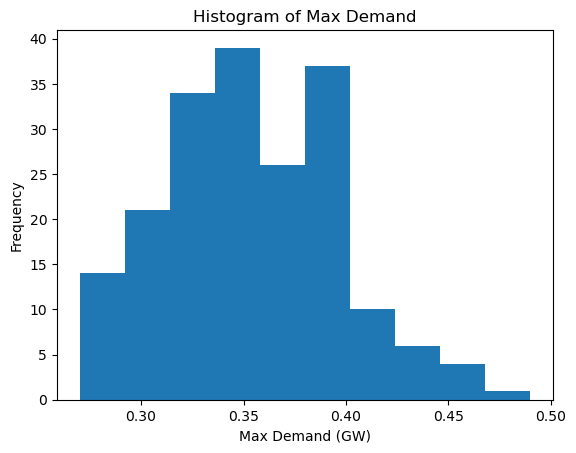

In [11]:
plt.hist(mytrainingdata["Max_Demand_GW"])
plt.xlabel("Max Demand (GW)")
plt.ylabel("Frequency")
plt.title("Histogram of Max Demand")
plt.show()

In [12]:
#Verify histogram

max_demand_min_value = mytrainingdata["Max_Demand_GW"].min()
max_demand_max_value = mytrainingdata["Max_Demand_GW"].max()
print("Minimum value in Max_Demand_GW column:", max_demand_min_value)
print("Maximum value in Max_Demand_GW column:", max_demand_max_value)
#This confirms that the histogram values
#From the histogram we can observe that 0.30-0.35 is the most frequency demand in the period
#Min demand was 0.27 and max demand was 0.49

#We can get the dates when these occurred
max_demand_max_date = mytrainingdata["Max_Demand_GW"].idxmax()
print("Date of maximum value in Max_Demand_GW column:", max_demand_max_date)
max_demand_min_date = mytrainingdata["Max_Demand_GW"].idxmin()
print("Date of minimum value in Max_Demand_GW column:", max_demand_min_date)

#Unsurprisingly the max demand occurred more recently and the minimum occurred very long ago

Minimum value in Max_Demand_GW column: 0.27
Maximum value in Max_Demand_GW column: 0.49
Date of maximum value in Max_Demand_GW column: 2017-08-01
Date of minimum value in Max_Demand_GW column: 2010-04-01


In [13]:
#Split the dataframe into X and y
#X = mytrainingdata.iloc[:,:-1] #all rows, all columns except the last column which is the target column
#y = mytrainingdata.iloc[:, -1] #all rows, last column which is the target column
#X: This contains all the features (independent variables) except the last column
#y: This contains only the last column, which is often the target variable you want to predict.

#X represents the input features
#y represents the target variable to be predicted

X_train = mytrainingdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)  #
y_train = mytrainingdata['Max_Demand_GW']
X_test = mytestdata.drop(['Max_Demand_GW','Plant_Production_GWh'],axis = 1)  #Plant_Production_GWh'
y_test = mytestdata['Max_Demand_GW']

In [14]:
X_train.shape

(192, 8)

In [15]:


y_train.shape

(192,)

In [16]:

X_test.shape

(48, 8)

In [17]:

y_test.shape

(48,)

#function from scikit-learn (sklearn) to split your dataset into training and testing sets. 
#wasn't needed as it had already been split


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=99)





# Initial DT Model

Initial model with only a set random state for repeatability

In [18]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=5)

#Fit the decision tree model to the training data
reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [19]:
#Use the trained Decision Tree Model 'reg' to make predictions on X_test
y_pred = reg.predict(X_test)

y_pred

array([0.41, 0.41, 0.38, 0.35, 0.33, 0.45, 0.46, 0.49, 0.42, 0.38, 0.35,
       0.35, 0.41, 0.38, 0.38, 0.33, 0.37, 0.38, 0.46, 0.49, 0.42, 0.37,
       0.33, 0.35, 0.37, 0.36, 0.36, 0.32, 0.33, 0.45, 0.49, 0.49, 0.42,
       0.34, 0.33, 0.37, 0.34, 0.36, 0.36, 0.32, 0.33, 0.4 , 0.49, 0.49,
       0.42, 0.37, 0.31, 0.31])

In [20]:
#Display y_test to be able to compare predicted with actual values
y_test

Date
2019-01-01    0.44
2019-02-01    0.43
2019-03-01    0.39
2019-04-01    0.36
2019-05-01    0.33
2019-06-01    0.45
2019-07-01    0.50
2019-08-01    0.48
2019-09-01    0.43
2019-10-01    0.39
2019-11-01    0.37
2019-12-01    0.39
2020-01-01    0.44
2020-02-01    0.41
2020-03-01    0.40
2020-04-01    0.35
2020-05-01    0.32
2020-06-01    0.39
2020-07-01    0.46
2020-08-01    0.48
2020-09-01    0.45
2020-10-01    0.44
2020-11-01    0.35
2020-12-01    0.38
2021-01-01    0.42
2021-02-01    0.43
2021-03-01    0.40
2021-04-01    0.34
2021-05-01    0.32
2021-06-01    0.54
2021-07-01    0.53
2021-08-01    0.56
2021-09-01    0.48
2021-10-01    0.42
2021-11-01    0.40
2021-12-01    0.43
2022-01-01    0.50
2022-02-01    0.47
2022-03-01    0.46
2022-04-01    0.37
2022-05-01    0.42
2022-06-01    0.54
2022-07-01    0.58
2022-08-01    0.57
2022-09-01    0.53
2022-10-01    0.41
2022-11-01    0.41
2022-12-01    0.40
Name: Max_Demand_GW, dtype: float64

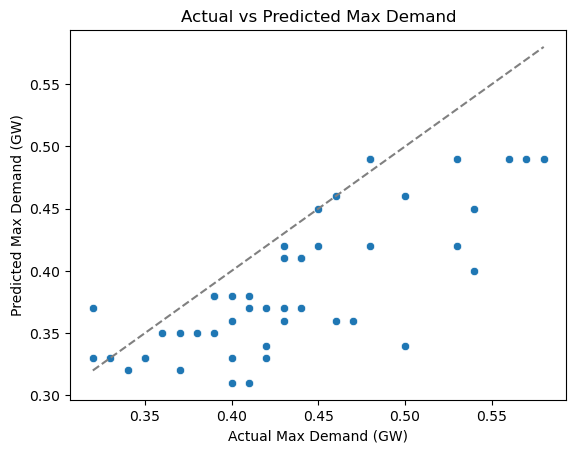

In [21]:
# Convert y_pred to a Pandas Series to analyze performance
y_pred_series = pd.Series(y_pred, index=y_test.index) #same DateTime index as y_test

results_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_series})

sns.scatterplot(data=results_df, x='y_test', y='y_pred')

# Diagonal line for reference (y_test = y_pred)
plt.plot([min(results_df['y_test']), max(results_df['y_test'])],
         [min(results_df['y_test']), max(results_df['y_test'])],
         linestyle='--', color='gray')

plt.xlabel('Actual Max Demand (GW)')
plt.ylabel('Predicted Max Demand (GW)')
plt.title('Actual vs Predicted Max Demand')

# Show the plot
plt.show()

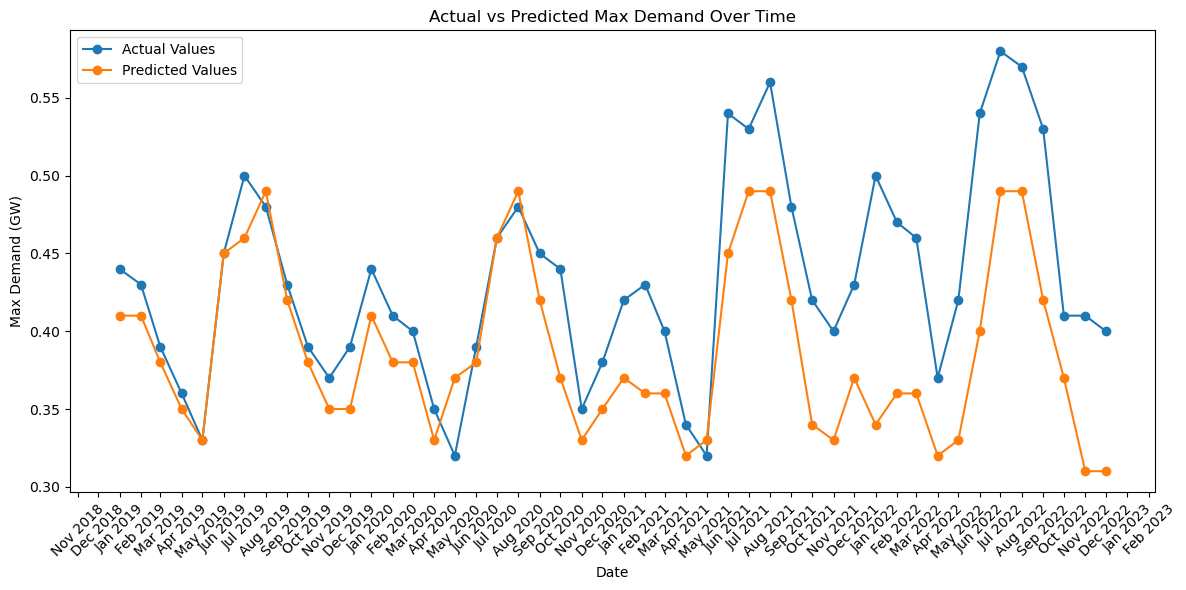

In [22]:
#Convert index to datetime
y_test.index = pd.to_datetime(y_test.index)


plt.figure(figsize=(14, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')


plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Max Demand Over Time')

plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.show()


In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred)


wape = calculate_wape(y_test,y_pred)

# Calculate the absolute percentage error for each prediction
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test) * 100

# Calculate the Mean Absolute Percentage Error (MAPE)
mape = np.mean(absolute_percentage_errors)


# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'WAPE: {wape:.2f}')
print(f'MAPE: {mape:.2f}%')

R-squared: 0.1034 (Ideal: 1)
Mean Absolute Error: 0.0488 (Ideal: 0)
Mean Squared Error: 0.0038 (Ideal: 0)
Root Mean Squared Error: 0.0620 (Ideal: 0)
Explained Variance Score: 0.5843 (Ideal: 1)
WAPE: 16.86
MAPE: 10.85%


Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Visualize Tree

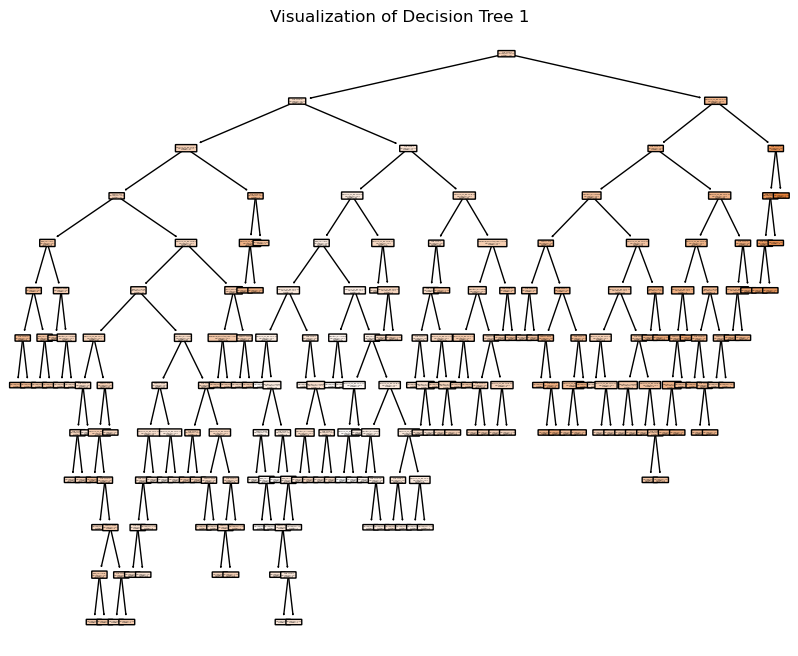

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_tree(reg, feature_names=X_train.columns.tolist(), filled=True, rounded=True)
plt.title("Visualization of Decision Tree 1")

# Export the visualization to a file with 600 DPI
plt.savefig('decision_tree_visualization_1.png', dpi=600)


plt.show()

# K-Fold Cross Validation

The default scoring method for regression tasks in scikit-learn's DecisionTreeRegressor is the coefficient of determination (R-squared), and it is equivalent to setting scoring=None. Therefore, when you use cross_val_score with a DecisionTreeRegressor without specifying the scoring parameter, it calculates the R-squared values by default.

K-Fold On Training Set 

In [25]:
# Assuming reg is your trained model
y_train_pred = reg.predict(X_train)

# Calculate R-squared for the training set
r2_train = r2_score(y_train, y_train_pred)

print(r2_train)

#The k-fold CV
from sklearn.model_selection import cross_val_score
#print("R SQUARED CV")
cv_scores = cross_val_score(reg,X_train,y_train,cv=10)
average_cv_score = cv_scores.mean()

print("Average Cross-Validation Score R2:", average_cv_score)

#BIG DIFFERENCE IN R2 BETWEEN THE OVERALL TRAIN R2 AND THE CV R2



1.0
Average Cross-Validation Score R2: 0.5350874774230455


R2 assumes lineratiy so it is better to do MSE

In [26]:
from sklearn.model_selection import cross_val_score

cv_scores_mse = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# The 'neg_mean_squared_error' is used because cross_val_score expects a utility function (higher is better),
# but MSE is a loss function (lower is better). So, negating it makes it a utility function.

average_cv_score_mse = -cv_scores_mse.mean()
print(cv_scores_mse)
print("Average Cross-Validation MSE:", average_cv_score_mse)


[-0.000645   -0.000595   -0.00094737 -0.00051053 -0.00038421 -0.00044211
 -0.00029474 -0.00072632 -0.00080526 -0.00134211]
Average Cross-Validation MSE: 0.0006692631578947367


The negative sign is used because scikit-learn conventionally considers scoring functions where higher values are better. For metrics like MSE, which are better when lower, the negation is applied to align with this convention.

# Cross Validation + Hyperparameter Tuning

# Grid Search CV - switch the parameters from markdown to code accordingly

In [27]:
# Define the best parameter grid for orig data

In [28]:

param_grid = {
    'max_depth': [4],#[11,12,13,14,15],#[4],[None,5,10,15,20,30,40,50],
    'min_samples_split': [7],#[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1],#[1,2,3,4],#5,6,7,8,9],
    #'max_features': [0.5],#['log2'],#['log2','sqrt', 0.5,0.6,0.7], #'log2', None,
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'criterion': ['absolute_error'],#['squared_error','absolute_error', 'friedman_mse'] #'poisson',
}


In [29]:
# Define the best parameter grid for augmented data


param_grid = {
    'max_depth': [13],#[11,12,13,14,15],#[4],[None,5,10,15,20,30,40,50],
    'min_samples_split': [2],#[2,3,4,5,6,7,8,9,10], #[7]
    'min_samples_leaf': [1],#[1,2,3,4],#5,6,7,8,9], #[2]
    #'max_features': [0.5],#['log2'],#['log2','sqrt', 0.5,0.6,0.7], #'log2', None,
    #'ccp_alpha': [0.0, 0.1, 0.2, 0.5, 1.0],
    #'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'criterion': ['absolute_error'],#['squared_error','absolute_error', 'friedman_mse'] #'poisson',
}


Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 7}


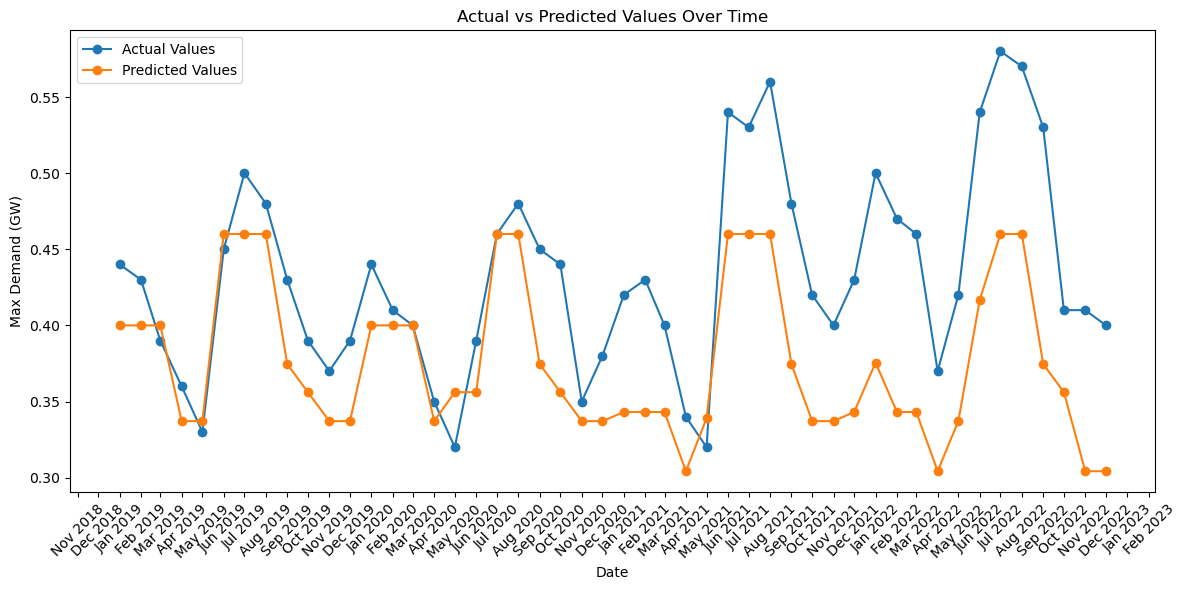

1st CV R-squared: -0.2017 (Ideal: 1) 

1st CV Mean Absolute Error: 0.0597 (Ideal: 0) 

1st CV Mean Squared Error: 0.0052 (Ideal: 0) 

1st CV Root Mean Squared Error: 0.0718 (Ideal: 0) 

1st CV Explained Variance Score: 0.5372 (Ideal: 1)
WAPE: 18.44
MAPE: 13.29%


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV



# Create the Random Forest regressor
regressor = DecisionTreeRegressor(random_state=5)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)


# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_model.predict(X_test)





#Convert index to datetime
y_test.index = pd.to_datetime(y_test.index)


plt.figure(figsize=(14, 6))


# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_best, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Format x-axis to show only months
month_locator = MonthLocator()
date_formatter = DateFormatter('%b %Y')

plt.gca().xaxis.set_major_locator(month_locator)
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.show()


# Calculate R-squared
r2b = r2_score(y_test, y_pred_best)

# Calculate Mean Absolute Error
maeb = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error
mseb = mean_squared_error(y_test, y_pred_best)

# Calculate Root Mean Squared Error
rmseb = np.sqrt(mseb)

# Calculate Explained Variance Score
explained_varianceb = explained_variance_score(y_test, y_pred_best)


# Calculate WAPE
wapeb = calculate_wape(y_test,y_pred_best)

# Calculate the absolute percentage error for each prediction
absolute_percentage_errors_new = np.abs((y_test - y_pred_best) / y_test) * 100

# Calculate the Mean Absolute Percentage Error (MAPE)
mapeb = np.mean(absolute_percentage_errors_new)



# Display the results
#print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'1st CV R-squared: {r2b:.4f} (Ideal: 1) \n')

#print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'1st CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')

#print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'1st CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')

#print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'1st CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')

#print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'1st CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')

print(f'WAPE: {wapeb:.2f}')

print(f'MAPE: {mapeb:.2f}%')


# K-Fold Cross Validation on Best Model

In [31]:
# Assuming 'reg' is your regression model
cv_scores_mse = cross_val_score(best_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# The 'neg_mean_squared_error' is used because cross_val_score expects a utility function (higher is better),
# but MSE is a loss function (lower is better). So, negating it makes it a utility function.

average_cv_score_mse = -cv_scores_mse.mean()

print(-cv_scores_mse)
print("Average Cross-Validation MSE:", average_cv_score_mse)

[0.00034145 0.00059544 0.00050743 0.00044353 0.00055859 0.00044747
 0.0002067  0.00065727 0.00083153 0.00225585]
Average Cross-Validation MSE: 0.0006845258939825448


# Nested CV with Randomized Search

# NOW ADDED MORE HYPERPARAMETERS TO SEARCH AND PRUNED
#EXPLORED EFFECT OF DIFFERENT SPLITTING CRITERIA

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# Create the decision tree regressor
regressor = DecisionTreeRegressor(random_state=5)


param_dist = {
    #'max_depth': randint(1, 10),
    'max_depth': [9,10],
    #'min_samples_split': randint(2, 11),
    'splitter':['best', 'random'],
    'min_samples_split': [3],
    #'min_samples_leaf': randint(1, 100), #should be 5 to 10 percent of dataset. Old has 126 rows so 6.3 to 12.6
    #'max_features': ['sqrt', 'log2', None, randint(1, 11)],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    #'max_leaf_nodes': randint(1, 5),
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}


# Create the outer cross-validation splits
outer_cv = KFold(n_splits=10, shuffle=True, random_state=5)

# Perform nested cross-validation with RandomizedSearchCV
random_search = RandomizedSearchCV(regressor, param_distributions=param_dist, n_iter=10, cv=10, scoring='neg_mean_squared_error', random_state=5)
nested_scores = cross_val_score(random_search, X=X_train, y=y_train, cv=outer_cv)

# Get the mean performance across outer folds
mean_nested_score = nested_scores.mean()

# Fit the model with the best hyperparameters on the entire training set
random_search.fit(X_train, y_train)
new_best_params = random_search.best_params_
best_reg = DecisionTreeRegressor(random_state=5, **new_best_params)
best_reg.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", new_best_params)

# Print the mean nested cross-validation score
print("Mean Nested Cross-Validation Score: {:.2f}".format(mean_nested_score))



# Train a new model with the best hyperparameters
best_reg = DecisionTreeRegressor(random_state=5, **new_best_params)
best_reg.fit(X_train, y_train)

y_pred_final = best_reg.predict(X_test)


# Plotting y_test and y_pred against date
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.plot(y_test.index, y_test, label='Actual Values', marker='o')

# Plotting y_pred
plt.plot(y_test.index, y_pred_final, label='Predicted Values', marker='o')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Max Demand (GW)')
plt.title('Actual vs Predicted Values Over Time')

# Adding a legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Calculate R-squared
r2c = r2_score(y_test, y_pred_final)

# Calculate Mean Absolute Error
maec = mean_absolute_error(y_test, y_pred_final)

# Calculate Mean Squared Error
msec = mean_squared_error(y_test, y_pred_final)

# Calculate Root Mean Squared Error
rmsec = np.sqrt(msec)

#Taking the square root of Mean Squared Error (MSE) gives you the Root Mean Squared Error (RMSE). The primary reason to use RMSE instead of MSE is that it has the same scale as the original target variable, making it more interpretable and easier to relate to the actual values of the variable.

# Calculate Explained Variance Score
explained_variancec = explained_variance_score(y_test, y_pred_final)

# Display the results
print(f'R-squared: {r2:.4f} (Ideal: 1)')
print(f'1st CV R-squared: {r2b:.4f} (Ideal: 1) \n')
print(f'2nd CV R-squared: {r2c:.4f} (Ideal: 1) \n')
print(f'Mean Absolute Error: {mae:.4f} (Ideal: 0)')
print(f'1st CV Mean Absolute Error: {maeb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Absolute Error: {maec:.4f} (Ideal: 0) \n')
print(f'Mean Squared Error: {mse:.4f} (Ideal: 0)')
print(f'1st CV Mean Squared Error: {mseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Mean Squared Error: {msec:.4f} (Ideal: 0) \n')
print(f'Root Mean Squared Error: {rmse:.4f} (Ideal: 0)')
print(f'1st CV Root Mean Squared Error: {rmseb:.4f} (Ideal: 0) \n')
print(f'2nd CV Root Mean Squared Error: {rmsec:.4f} (Ideal: 0) \n')
print(f'Explained Variance Score: {explained_variance:.4f} (Ideal: 1)')
print(f'1st CV Explained Variance Score: {explained_varianceb:.4f} (Ideal: 1)')
print(f'2nd CV Explained Variance Score: {explained_variancec:.4f} (Ideal: 1)')

# Feature Importances

In [32]:
# For original DT

f_list = list(X_train.columns)
f_importance = pd.Series(reg.feature_importances_,index = f_list).sort_values(ascending = False)
print(f_importance)

tavg                         0.720579
emissions_c02_GG             0.173542
tmax                         0.041156
GDP_bln                      0.025843
Population_k                 0.017732
tmin                         0.017264
Renewables_Production_GWh    0.002686
Imports_GWh                  0.001199
dtype: float64


In [33]:
# For best DT

f_list = list(X_train.columns)
f_importance = pd.Series(best_model.feature_importances_, index=f_list).sort_values(ascending=False)

normalized_importances = (f_importance - f_importance.min()) / (f_importance.max() - f_importance.min())
print("Normalized Feature Importances:")
print(normalized_importances)


Normalized Feature Importances:
tavg                         1.000000
emissions_c02_GG             0.177589
tmax                         0.033299
GDP_bln                      0.008338
Imports_GWh                  0.000000
Renewables_Production_GWh    0.000000
Population_k                 0.000000
tmin                         0.000000
dtype: float64
